In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Display first 5 rows of dataset
print("Sample Data:\n", df.head())

Sample Data:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
# Encode categorical variable (Gender)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0

In [5]:
# Split data into features and target variable
X = df[['Age', 'Gender', 'EstimatedSalary']]
y = df['Purchased']

In [6]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nFeature Scaling Formula: X_scaled = (X - mean) / std_dev")


Feature Scaling Formula: X_scaled = (X - mean) / std_dev


In [8]:
# Train Logistic Regression model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [9]:
# Predict on test set
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Purchased)

In [10]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

In [11]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

In [12]:
print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy: {accuracy:.2f} (Formula: (TP + TN) / (TP + FP + TN + FN))")
print(f"Error Rate: {error_rate:.2f} (Formula: 1 - Accuracy)")
print(f"Precision: {precision:.2f} (Formula: TP / (TP + FP))")
print(f"Recall: {recall:.2f} (Formula: TP / (TP + FN))")


Confusion Matrix:
 [[61  2]
 [10 27]]

Accuracy: 0.88 (Formula: (TP + TN) / (TP + FP + TN + FN))
Error Rate: 0.12 (Formula: 1 - Accuracy)
Precision: 0.93 (Formula: TP / (TP + FP))
Recall: 0.73 (Formula: TP / (TP + FN))


In [13]:
# Display some predictions with their probabilities
df_results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred, "Probability": y_prob})
print("\nSample Predictions with Probability:\n", df_results.head())


Sample Predictions with Probability:
    Actual  Predicted  Probability
0       0          0     0.256162
1       1          1     0.970599
2       0          0     0.022047
3       1          1     0.840019
4       0          0     0.016160


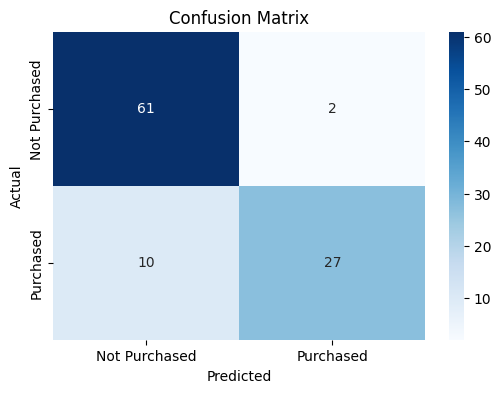

In [14]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()